In [60]:
import lightkurve as lk

In [61]:
tpf = lk.KeplerTargetPixelFile('/Users/ryanr/Documents/PhD/coding/Kepler/Data/ktwo203830112-c112_lpd-targ.fits.gz',quality_bitmask='hardest')

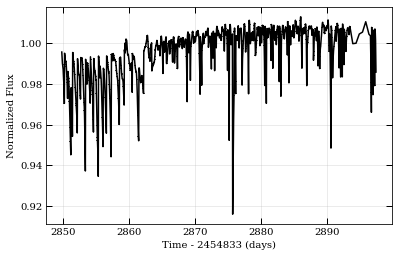

In [62]:
lc = tpf.to_lightcurve()
lc.plot()

The transient is reflected in this due to the way the prf is calculated. For each frame the PRF calculates the centroid position based on the distribution of flux in the entire TPF. When the transient emerges the centroid position moves as a function of the transients brightness. This results in the the science target losing brightness based on the transient's light curve, giving the reflected shape.

To overcome this we need to create a model for two sources, following the lightkurve guide (http://lightkurve.keplerscience.org/tutorials/2.10-how-to-use-prf-photometry.html). 

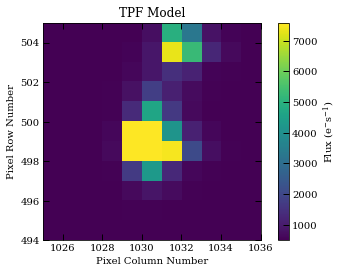

In [63]:
from lightkurve.prf import TPFModel, StarPrior, BackgroundPrior, FocusPrior, MotionPrior
from lightkurve.prf import GaussianPrior, UniformPrior, FixedValuePrior
model = TPFModel(star_priors=[StarPrior(col=GaussianPrior(mean=1030.5, var=0.1),
                                        row=GaussianPrior(mean=499, var=0.1),
                                        flux=UniformPrior(lb=0, ub=2e5)),
                              StarPrior(col=GaussianPrior(mean=1032, var=0.1),
                                        row=GaussianPrior(mean=504, var=0.1),
                                        flux=UniformPrior(lb=0, ub=5e4))],
                 background_prior=BackgroundPrior(flux=GaussianPrior(mean=500., var=100**2.)),
                 focus_prior=FocusPrior(scale_col=GaussianPrior(mean=1, var=0.0001),
                                        scale_row=GaussianPrior(mean=1, var=0.0001),
                                        rotation_angle=UniformPrior(lb=-3.1415, ub=3.1415)),
                 motion_prior=MotionPrior(shift_col=GaussianPrior(mean=0., var=1),
                                          shift_row=GaussianPrior(mean=0., var=1)),
                 prfmodel=tpf.get_prf_model(),
                 fit_background=True,
                 fit_focus=False,
                 fit_motion=True)
model.plot()

Using the above model to do PRF on the TPF.







Fitting cadences:   0%|          | 0/2039 [00:00<?, ?it/s]

Fitting cadences:   0%|          | 1/2039 [00:00<15:28,  2.19it/s]

Fitting cadences:   0%|          | 4/2039 [00:00<11:27,  2.96it/s]

Fitting cadences:   0%|          | 5/2039 [00:00<10:56,  3.10it/s]

Fitting cadences:   0%|          | 7/2039 [00:01<08:18,  4.08it/s]

Fitting cadences:   0%|          | 8/2039 [00:01<08:05,  4.18it/s]

Fitting cadences:   0%|          | 9/2039 [00:01<08:37,  3.92it/s]

Fitting cadences:   1%|          | 12/2039 [00:01<06:41,  5.05it/s]

Fitting cadences:   1%|          | 13/2039 [00:01<06:54,  4.89it/s]

Fitting cadences:   1%|          | 14/2039 [00:02<06:05,  5.54it/s]

Fitting cadences:   1%|          | 16/2039 [00:02<05:00,  6.73it/s]

Fitting cadences:   1%|          | 17/2039 [00:02<05:20,  6.30it/s]

Fitting cadences:   1%|          | 19/2039 [00:02<04:21,  7.72it/s]

Fitting cadences:   1%|          | 21/2039 [00:02<04:31,  7.43it/s]

Fitting cadences:   1%|          | 23/2039 

Fitting cadences:  45%|████▌     | 925/2039 [01:32<01:43, 10.75it/s]


Fitting cadences:  66%|██████▌   | 1342/2039 [02:20<01:31,  7.59it/s]


Fitting cadences:  86%|████████▌ | 1757/2039 [03:07<00:35,  7.93it/s]


Fitting cadences: 100%|██████████| 2039/2039 [03:50<00:00,  6.87it/s]


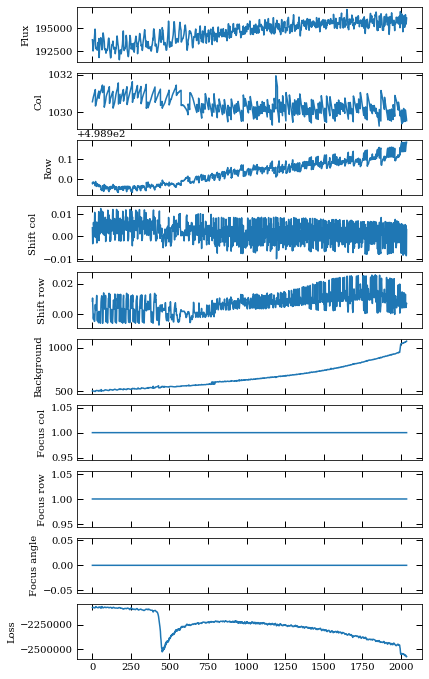

In [58]:
from lightkurve import PRFPhotometry
prfphot = PRFPhotometry(model=model)
prfphot.run(tpf.flux + tpf.flux_bkg)
prfphot.plot_results();

  <StarParameters(
    col=1029.8331392794748
    row=499.06484906707965
    flux=195732.56325014058
    targetid=None)>
  <StarParameters(
    col=1031.5407714142257
    row=506.50078970247614
    flux=16928.302018979815
    targetid=None)>
  <BackgroundParameters(
    flux=1039.69513610591
    fitted=True)>
  <FocusParameters(
    scale_col=[1]
    scale_row=[1]
    rotation_angle=[ 0.]
    fitted=False)>
  <MotionParameters(
    shift_col=0.005344126986933116
    shift_row=0.004741489920011181
    fitted=True)>
  residual_image:
    [  69.78704163  526.22991272  132.97075749  122.64180551...
  predicted_image:
    [ 1039.69513611  1039.69513611  1039.69513606  1041.79825797...

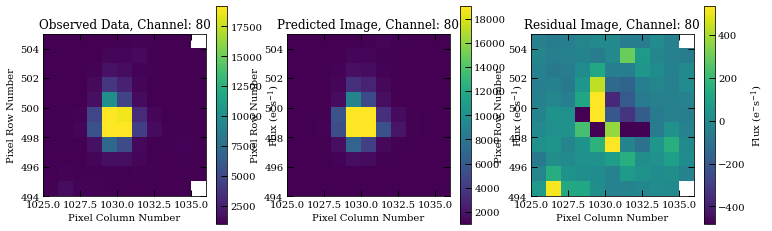

In [71]:
model.plot_diagnostics(tpf.flux[2000] + tpf.flux_bkg[2000])

In [55]:
np.nanmedian(tpf.flux_bkg)

587.367

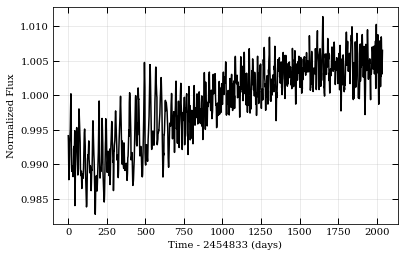

In [65]:
prfphot.lightcurves[0].plot()

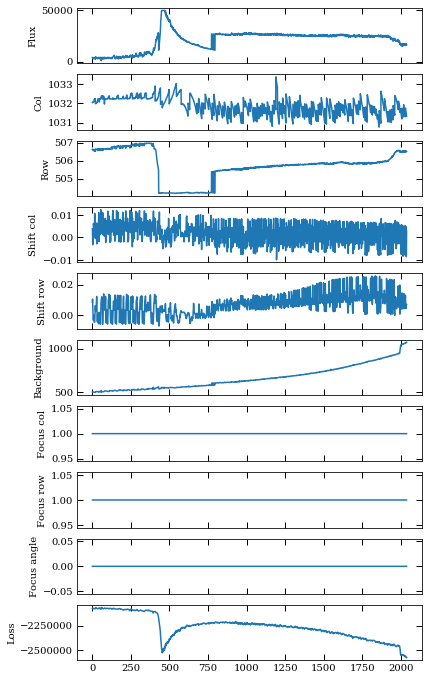

In [72]:
prfphot.plot_results(1)

In [42]:
tpf.interact()

Loading BokehJS ...

Output()